#### Challenge Técnico (Core)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [2]:
df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')


In [3]:
df_train

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [4]:
df_test

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


Eliminamos las columnas id de ambas datas

In [4]:
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

In [5]:
utils.calculate_na_statistics(df_train)

,datos sin NAs en q,Na en q,Na en %
person_age,58645,0,0.0
person_income,58645,0,0.0
person_home_ownership,58645,0,0.0
person_emp_length,58645,0,0.0
loan_intent,58645,0,0.0
loan_grade,58645,0,0.0
loan_amnt,58645,0,0.0
loan_int_rate,58645,0,0.0
loan_percent_income,58645,0,0.0
cb_person_default_on_file,58645,0,0.0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_length'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_percent_income'}>],
       [<Axes: title={'center': 'cb_person_cred_hist_length'}>,
        <Axes: title={'center': 'loan_status'}>, <Axes: >]], dtype=object)

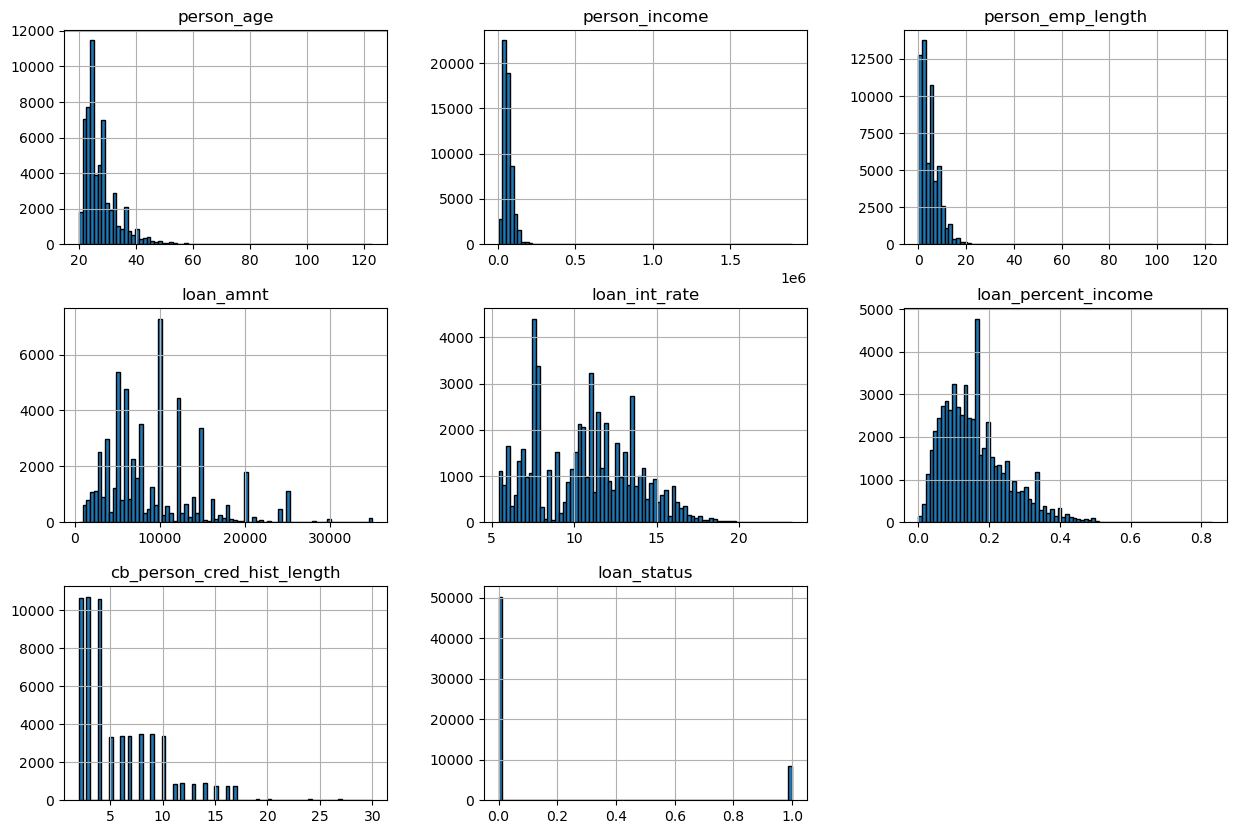

In [7]:
df_train.hist(bins='rice', figsize=(15, 10), edgecolor='black')

Verificamos los Outliers

In [8]:
# Identify numerical columns
numerical_columns = df_train.select_dtypes(include=[np.number])
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = utils.detect_outliers_iqr(df_train[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df_train[column][~outliers].min(),
        'Upper Bound': df_train[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
person_age,2446.0,4.170859,20.00,40.00
person_income,2411.0,4.111177,4200.00,126000.00
person_emp_length,1274.0,2.172393,0.00,14.00
loan_amnt,2045.0,3.487083,500.00,22500.00
loan_int_rate,34.0,0.057976,5.42,20.62
loan_percent_income,1210.0,2.063262,0.00,0.39
cb_person_cred_hist_length,1993.0,3.398414,2.00,15.00
loan_status,8350.0,14.238213,0.00,0.00


Creamos una copia de la data para trabajar mejor

In [10]:
data2 = df_train.copy()

In [11]:
data2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [12]:
data2[['loan_status','cb_person_default_on_file']].value_counts()

loan_status  cb_person_default_on_file
0            N                            44194
             Y                             6101
1            N                             5749
             Y                             2601
Name: count, dtype: int64

Convertimos las columnas Y N o 0 1 a Bool

In [13]:
data2['cb_person_default_on_file'] = data2['cb_person_default_on_file'].map({'Y': True, 'N': False})
data2['loan_status'] = data2['loan_status'].map({1: True, 0: False})


Convertimos los object a category

In [14]:
data2['loan_intent'] = data2['loan_intent'].astype('category')
data2['person_home_ownership'] = data2['person_home_ownership'].astype('category')
data2['loan_grade'] = data2['loan_grade'].astype('category')



Verificamos

In [15]:
data2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,False,14,False
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,False,2,False
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,False,10,False
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,False,5,False
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,False,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,True,10,False
58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,False,8,True
58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,False,2,True
58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,False,3,False


In [16]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  58645 non-null  int64   
 1   person_income               58645 non-null  int64   
 2   person_home_ownership       58645 non-null  category
 3   person_emp_length           58645 non-null  float64 
 4   loan_intent                 58645 non-null  category
 5   loan_grade                  58645 non-null  category
 6   loan_amnt                   58645 non-null  int64   
 7   loan_int_rate               58645 non-null  float64 
 8   loan_percent_income         58645 non-null  float64 
 9   cb_person_default_on_file   58645 non-null  bool    
 10  cb_person_cred_hist_length  58645 non-null  int64   
 11  loan_status                 58645 non-null  bool    
dtypes: bool(2), category(3), float64(3), int64(4)
memory usage: 3.4 MB


Seleccionamos las datas

In [24]:
numerical_columns = data2.select_dtypes(include=['int64', 'float64'])
categorical_columns = data2.select_dtypes(include=['category'])
boolean_columns = data2.select_dtypes(include=['bool'])

Verificamos las correlaciones

In [17]:
numerical_columns.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
person_age,1.000000,0.102176,0.121276,0.050378,0.009653,-0.031975,0.874260,-0.001130
person_income,0.102176,1.000000,0.164042,0.310942,-0.057611,-0.280314,0.082727,-0.169956
person_emp_length,0.121276,0.164042,1.000000,0.092046,-0.101910,-0.065824,0.102842,-0.100428
loan_amnt,0.050378,0.310942,0.092046,1.000000,0.113582,0.647266,0.045720,0.144982
loan_int_rate,0.009653,-0.057611,-0.101910,0.113582,1.000000,0.152201,0.007535,0.338948
loan_percent_income,-0.031975,-0.280314,-0.065824,0.647266,0.152201,1.000000,-0.023202,0.378280
cb_person_cred_hist_length,0.874260,0.082727,0.102842,0.045720,0.007535,-0.023202,1.000000,-0.003030
loan_status,-0.001130,-0.169956,-0.100428,0.144982,0.338948,0.378280,-0.003030,1.000000


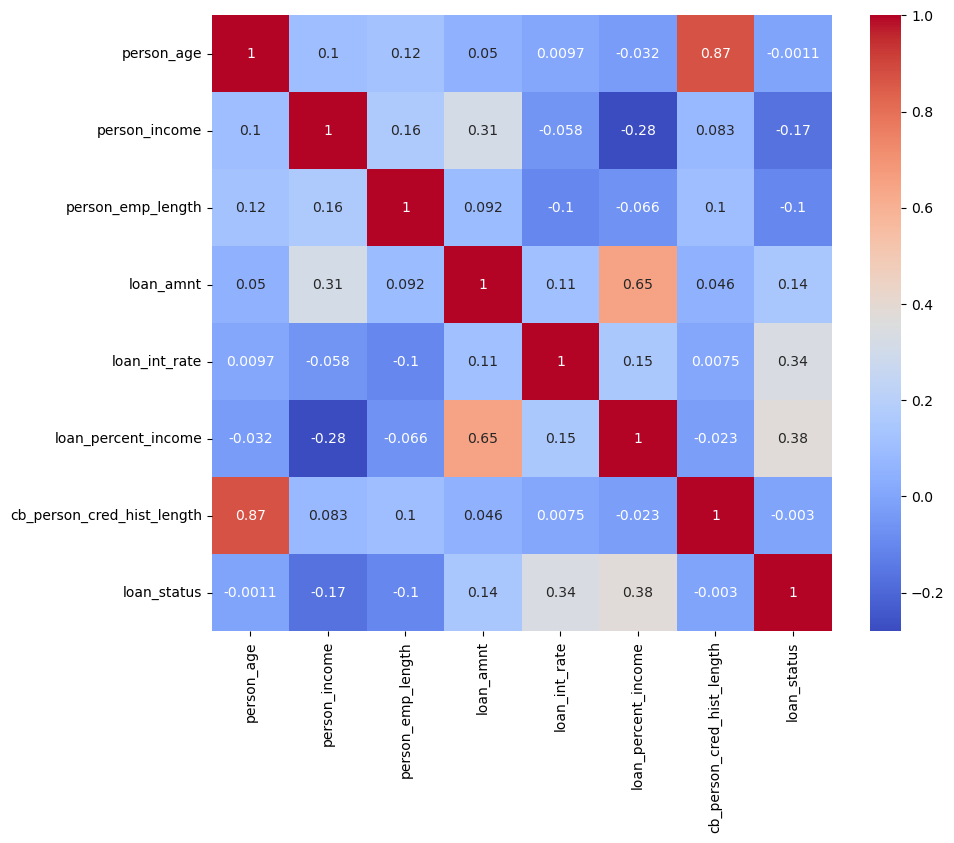

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm')
plt.show()

Concatenamos en un nuevo dataframe para usar en los modelos

In [25]:
data_clean = pd.concat([numerical_columns, categorical_columns, boolean_columns], axis=1)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  58645 non-null  int64   
 1   person_income               58645 non-null  int64   
 2   person_emp_length           58645 non-null  float64 
 3   loan_amnt                   58645 non-null  int64   
 4   loan_int_rate               58645 non-null  float64 
 5   loan_percent_income         58645 non-null  float64 
 6   cb_person_cred_hist_length  58645 non-null  int64   
 7   person_home_ownership       58645 non-null  category
 8   loan_intent                 58645 non-null  category
 9   loan_grade                  58645 non-null  category
 10  cb_person_default_on_file   58645 non-null  bool    
 11  loan_status                 58645 non-null  bool    
dtypes: bool(2), category(3), float64(3), int64(4)
memory usage: 3.4 MB


### **Modeling**

In [26]:
data_clean

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,loan_status
0,37,35000,0.0,6000,11.49,0.17,14,RENT,EDUCATION,B,False,False
1,22,56000,6.0,4000,13.35,0.07,2,OWN,MEDICAL,C,False,False
2,29,28800,8.0,6000,8.90,0.21,10,OWN,PERSONAL,A,False,False
3,30,70000,14.0,12000,11.11,0.17,5,RENT,VENTURE,B,False,False
4,22,60000,2.0,6000,6.92,0.10,3,RENT,MEDICAL,A,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,5.0,25000,15.95,0.21,10,MORTGAGE,EDUCATION,D,True,False
58641,28,28800,0.0,10000,12.73,0.35,8,RENT,MEDICAL,C,False,True
58642,23,44000,7.0,6800,16.00,0.15,2,RENT,EDUCATION,D,False,True
58643,22,30000,2.0,5000,8.90,0.17,3,RENT,EDUCATION,A,False,False


In [27]:
X = data_clean.drop('loan_status', axis=1)
y = data_clean['loan_status']

# Codificación de variables categóricas
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade']
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Escalado de características numéricas
scaler = StandardScaler()
numerical_columns = ['person_age', 'person_income', 'person_emp_length', 
                     'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
                     'cb_person_cred_hist_length']
X_encoded[numerical_columns] = scaler.fit_transform(X_encoded[numerical_columns])

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Modelos iniciales
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier()
}

# Entrenamiento y evaluación inicial
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}")

# Optimización de hiperparámetros para el modelo seleccionado
param_grid = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Decision Tree': {'max_depth': [3, 5, 10]},
    'XGBoost': {'n_estimators': [50, 100, 200]},
    'LightGBM': {'num_leaves': [31, 50, 100]}
}

best_models = {}
for name, model in models.items():
    grid = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"Best {name}: {grid.best_params_}")

# Evaluación en el conjunto de prueba
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"{name} - Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{name} - F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"{name} - AUC-ROC: {roc_auc_score(y_test, y_pred):.4f}")


Logistic Regression: Mean Accuracy = 0.9121
KNN: Mean Accuracy = 0.9283
Decision Tree: Mean Accuracy = 0.9135


c:\Users\guill\anaconda3\envs\mitic\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:07:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\guill\anaconda3\envs\mitic\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:07:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\guill\anaconda3\envs\mitic\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:07:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\g

XGBoost: Mean Accuracy = 0.9506
[LightGBM] [Info] Number of positive: 5366, number of negative: 32166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 893
[LightGBM] [Info] Number of data points in the train set: 37532, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142971 -> initscore=-1.790827
[LightGBM] [Info] Start training from score -1.790827
[LightGBM] [Info] Number of positive: 5367, number of negative: 32166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 886
[LightGBM] [Info] Number of data points in the train set: 37533, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.1429

c:\Users\guill\anaconda3\envs\mitic\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:09:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\guill\anaconda3\envs\mitic\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:09:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\guill\anaconda3\envs\mitic\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:09:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\g

Best XGBoost: {'n_estimators': 50}
[LightGBM] [Info] Number of positive: 5366, number of negative: 32166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 893
[LightGBM] [Info] Number of data points in the train set: 37532, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142971 -> initscore=-1.790827
[LightGBM] [Info] Start training from score -1.790827
[LightGBM] [Info] Number of positive: 5367, number of negative: 32166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006818 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 886
[LightGBM] [Info] Number of data points in the train set: 37533, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.1

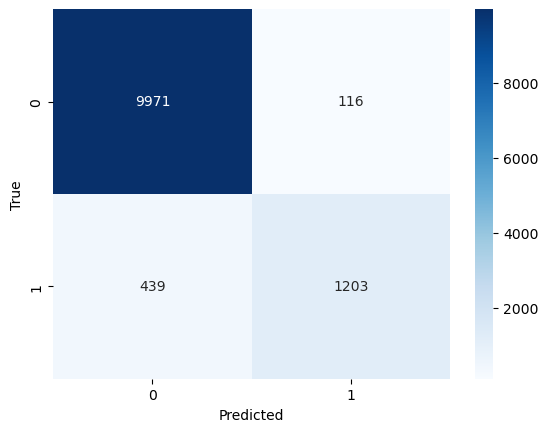

In [29]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

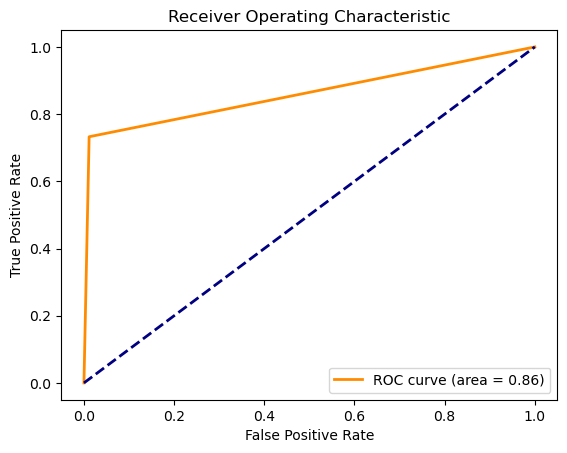

In [28]:
from sklearn.metrics import roc_curve, auc
#Curva roc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Preparacion para el envio

In [20]:
import pandas as pd

# Realiza las predicciones con el mejor modelo (por ejemplo, LightGBM)
best_model = best_models['LightGBM']  # Cambia 'LightGBM' al modelo que prefieras
y_pred_test = best_model.predict(X_test)

# Crea un DataFrame para la salida
submission = pd.DataFrame({
    'id': X_test.index,  # Usa el índice como identificador
    'loan_status': y_pred_test.astype(int)  # Asegúrate de convertir a enteros si es necesario
})

# Guarda el archivo en formato CSV
submission.to_csv('submission.csv', index=False)

print("Archivo 'submission.csv' generado correctamente.")


Archivo 'submission.csv' generado correctamente.
